# Laminar analysis of the cortical sheet in Python

* Pierre-Louis Bazin (Max-Planck Institute Leipzig)
* Konrad Wagstyl (University of Cambridge)
* Chris Steele (Douglas Mental Health University Institute Montreal)
* Thomas Funck (McGill University Montreal)
* Julia Huntenburg (Max-Planck Institute Leipzig)

Bok 1929


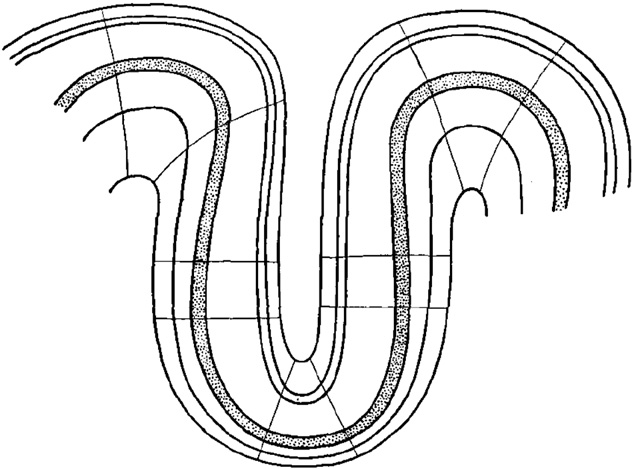

In [2]:
from IPython.display import Image
print "Bok 1929"
Image(filename='/SCR/mpi/ohbm_2016/pics/bok.png', width=300) 

Waehnert et al., 2014


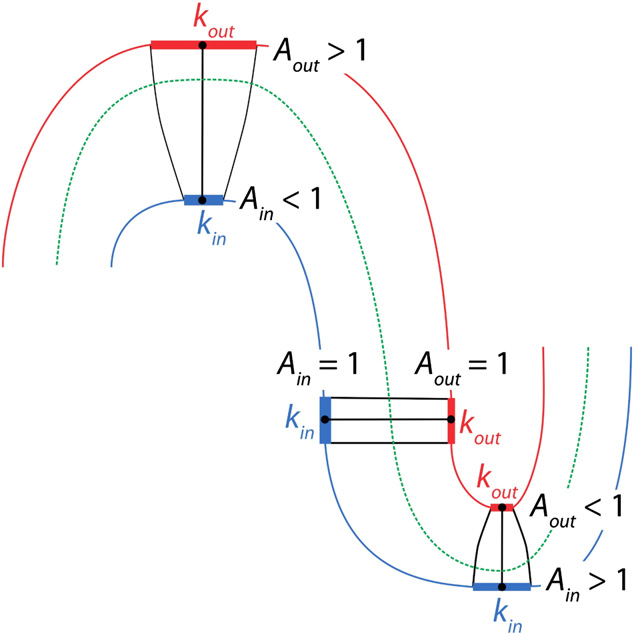

In [21]:
print "Waehnert et al., 2014"
Image(filename='/SCR/mpi/ohbm_2016/pics/waehnert.png', width=300) 

### *We have*: 
CBSTools for extracting intracortical layers in a volume-preserving approach, sampling data on these surfaces, ...

### *But*: 
Dependent on MIPAV/JIST framework -- hard to install, 

### *We want*: 
CBSTools in Python -- easy to install, easy to use, easy to integrate with other Python-based tools

## Code

https://github.com/juhuntenburg/laminar_python

https://github.molgen.mpg.de/bazin/cbstools-public

## Demo

In [1]:
%matplotlib inline

In [2]:
from nilearn import plotting
from nilearn._utils.niimg_conversions import _index_img
import matplotlib.pyplot as plt

### Import functions

In [3]:
import volumetric_layering

### Inputs

In [3]:
lut_dir = '/home/julia/workspace/cbstools/lookuptables/'
data_dir = '/SCR/data/demo/'

gwb_prob = data_dir + 'adult_F04_intern_orig_binmask.nii.gz'
cgb_prob = data_dir + 'adult_F04_extern_orig_binmask.nii.gz'
intensity = data_dir + 'F04_01032013_MSME_TEsum_magn_initial.nii'
mesh = data_dir + 'adult_F04__surf_2-2.vtk'

In [5]:
coords = (-5, -2, 1)
n_layers = 5

### Simplest input: tissue classification

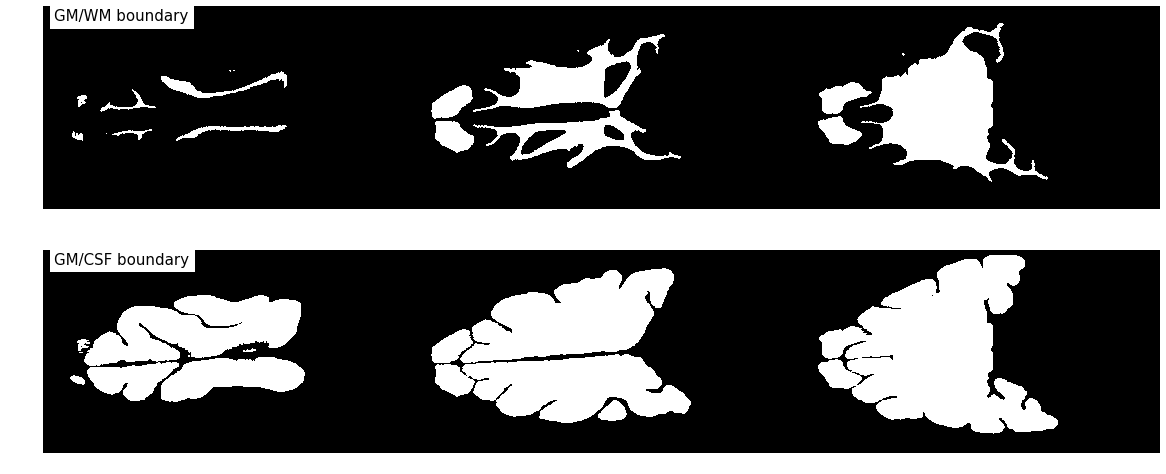

In [6]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_anat(gwb_prob, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='GM/WM boundary')
ax2=fig.add_subplot(212)
plotting.plot_anat(cgb_prob, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='GM/CSF boundary')

### Transforming to levelsets

In [7]:
gwb = volumetric_layering.create_levelsets(gwb_prob, base_name=data_dir+'gwb')

In [8]:
cgb = volumetric_layering.create_levelsets(cgb_prob, base_name=data_dir+'cgb')

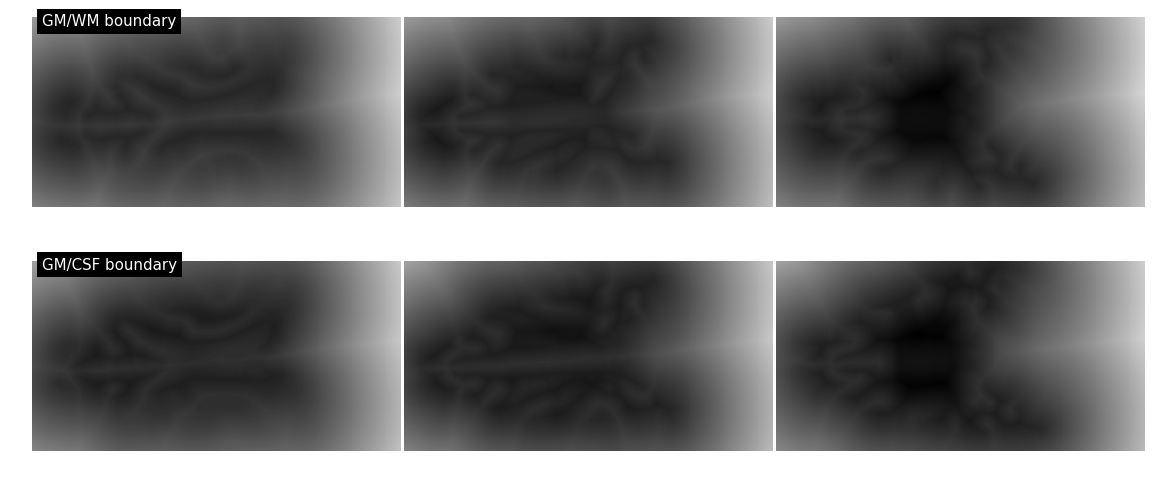

In [9]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_anat(gwb, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='GM/WM boundary')
ax2=fig.add_subplot(212)
plotting.plot_anat(cgb, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='GM/CSF boundary')

### Finding equivolumetric layers

In [10]:
depth, layers, boundaries = volumetric_layering.layering(gwb, cgb, lut_dir, n_layers=n_layers, 
                                                         base_name=data_dir+'layering')

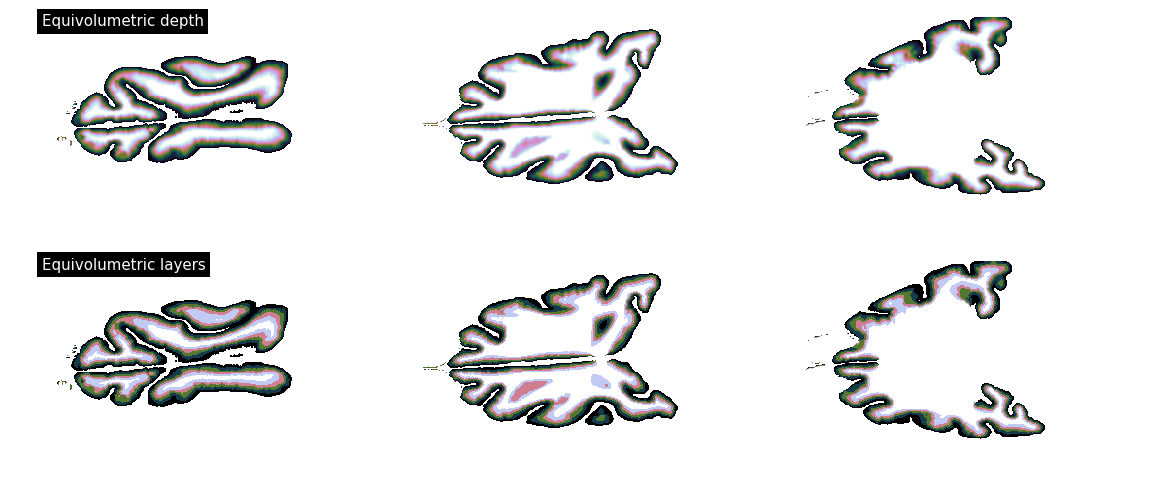

In [11]:
fig=plt.figure(figsize=(20,8));
ax1=fig.add_subplot(211)
plotting.plot_img(depth, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax1, title='Equivolumetric depth', cmap='cubehelix_r')
ax2=fig.add_subplot(212)
plotting.plot_img(layers, annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                   figure=fig, axes=ax2, title='Equivolumetric layers', cmap='cubehelix_r', vmin=0, vmax=5)

### Sampling intensity on layers

In [12]:
profiles = volumetric_layering.profile_sampling(boundaries, intensity, base_name=data_dir+'profile_volume')

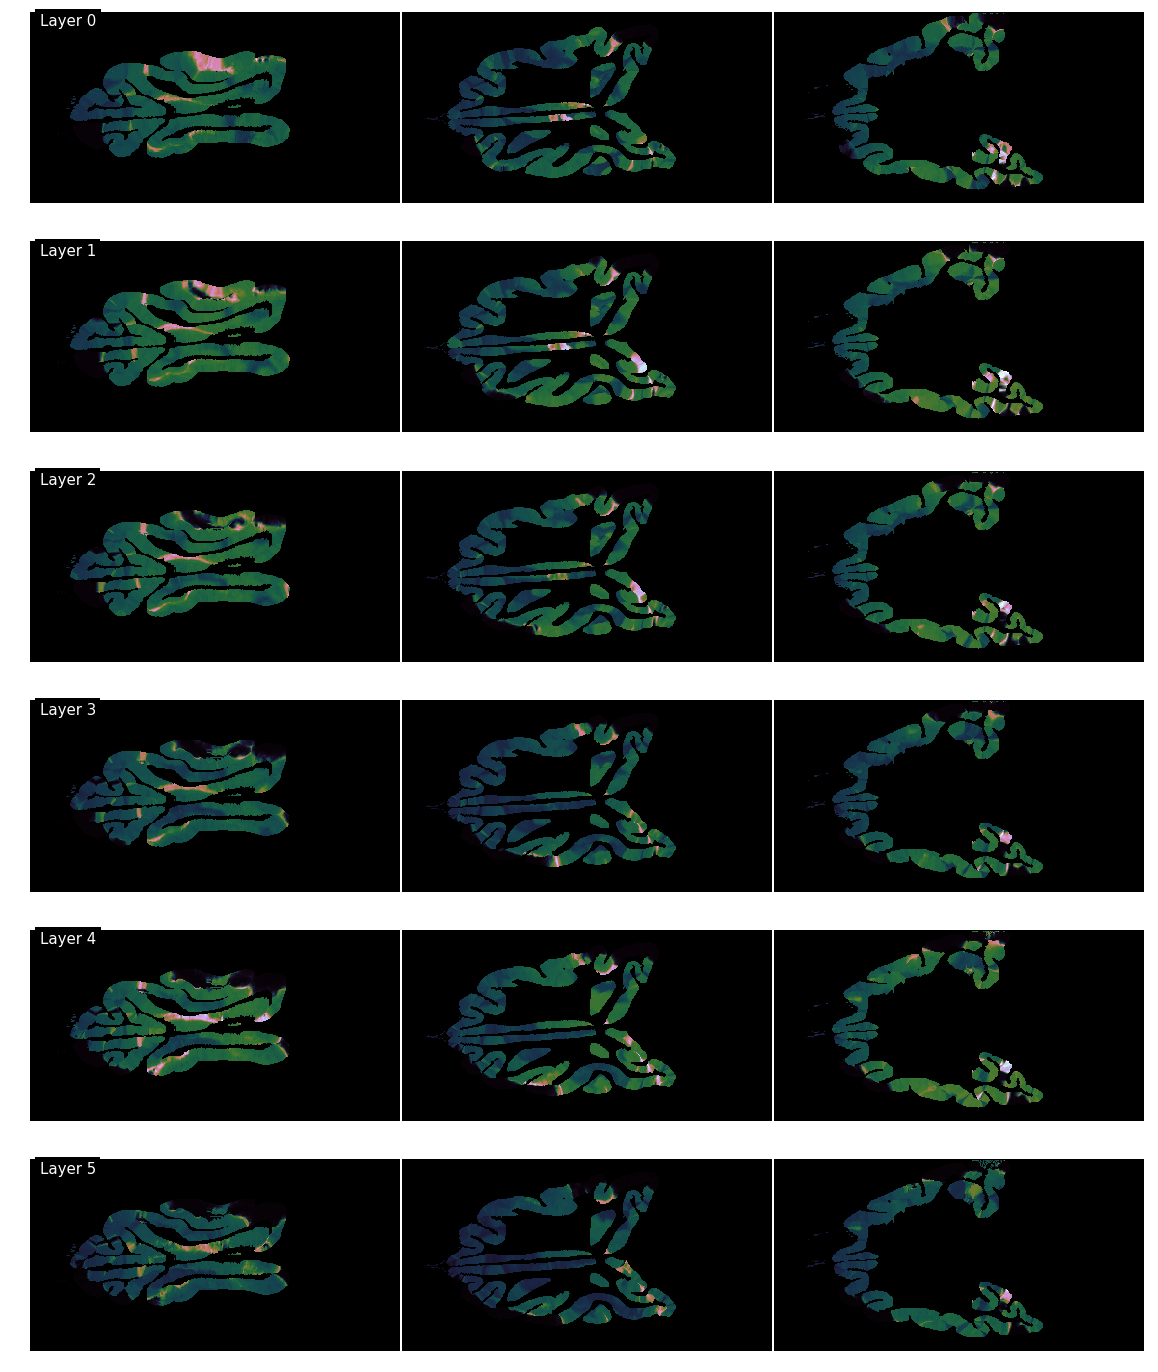

In [13]:
fig=plt.figure(figsize=(20,(n_layers+1)*4));
for i in range(n_layers+1):
    ax=fig.add_subplot(n_layers+1,1,i+1)
    plotting.plot_img(_index_img(profiles, i), annotate=False, draw_cross=False, display_mode='z', cut_coords=coords, 
                       figure=fig, axes=ax, title='Layer %s'%str(i), cmap='cubehelix', black_bg=False)

### If you are more into meshes

In [6]:
profile_meshes = volumetric_layering.profile_meshing(profiles, mesh, base_name=data_dir+'profile_meshes')

NameError: name 'profiles' is not defined

### Look at your mesh --> thanks to Anisha!

In [22]:
from nbpapaya import Surface

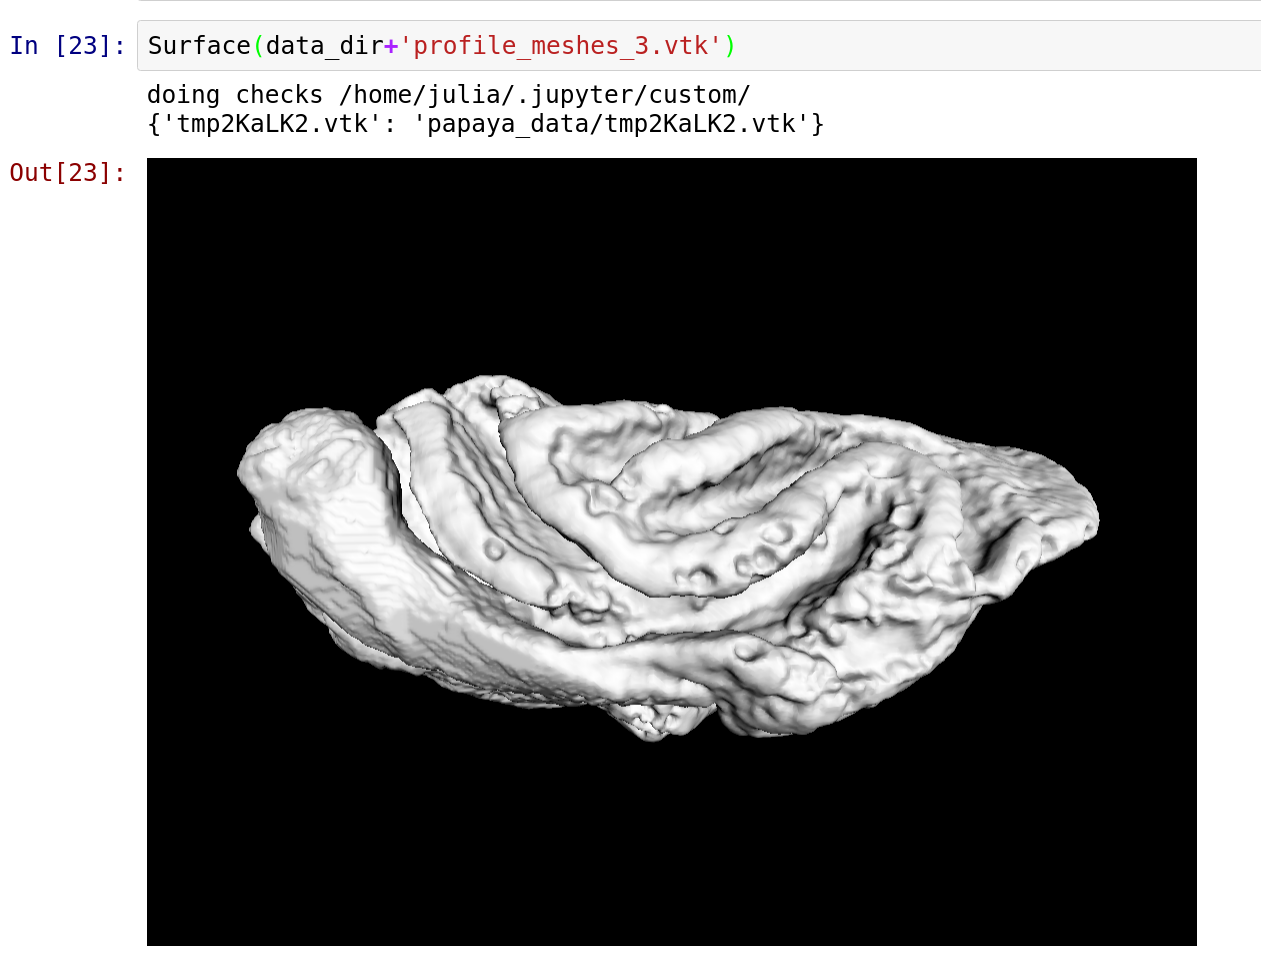

In [6]:
#Surface(data_dir+'profile_meshes_3.vtk')
Image('/home/julia/Pictures/ferret.png', width=800)

## Future

* Build Python interfaces for more CBSTools modules
* Integration of the two codebases
* Integration with pure Python functions to work with laminar data
* (Integration with visualization)

# Thanks!